In [2]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
from scipy import stats

In [4]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [5]:
model_vars_data = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp August\Machine Learning Project\data\model_vars_data.csv',index_col=0)

test_vars_data = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp August\Machine Learning Project\data\test_vars_data.csv',index_col=0)

price_train = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp August\Machine Learning Project\data\y_train.csv',index_col=0)

price_test = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp August\Machine Learning Project\data\y_test.csv',index_col=0)

In [6]:
model_vars_data.columns


Index(['ExterCond', 'Fireplaces', 'BsmtQual', 'GarageCars', 'BsmtFinType1',
       'BsmtUnfSF', 'MSSubClass_50', 'years_since_remodeled_', 'BsmtFullBath',
       'MSSubClass_60', 'HouseStyle_SFoyer', 'LotArea', 'TotRmsAbvGrd',
       'log_OpenPorchSF', 'BsmtFinType2', 'BldgType_TwnhsE', 'MSSubClass',
       'yeo_GarageArea', 'MiscVal', 'FullBath', 'BedroomAbvGr', 'BsmtCond',
       'MSSubClass_30', 'HouseStyle_2Story', 'house_age_', 'KitchenQual',
       'HeatingQC', '2ndFlrSF', 'log_MasVnrArea', 'FireplaceQu',
       'log_WoodDeckSF', 'BsmtFinSF2', 'PavedDrive_Y', 'GarageYrBlt',
       'OverallQual', 'bc_LotArea', 'BsmtFinSF1', 'HalfBath',
       'yeo_TotalBsmtSF', 'GrLivArea', 'LotShape', 'LandSlope',
       'yeo_LotFrontage', 'ExterQual', 'log_first_FlrSF', 'GarageQual',
       'bc_GrLivArea'],
      dtype='object')

In [7]:
pd.set_option('display.max_columns', None)
model_vars_data.describe()

,ExterCond,Fireplaces,BsmtQual,GarageCars,BsmtFinType1,BsmtUnfSF,MSSubClass_50,years_since_remodeled_,BsmtFullBath,MSSubClass_60,HouseStyle_SFoyer,LotArea,TotRmsAbvGrd,log_OpenPorchSF,BsmtFinType2,BldgType_TwnhsE,MSSubClass,yeo_GarageArea,MiscVal,FullBath,BedroomAbvGr,BsmtCond,MSSubClass_30,HouseStyle_2Story,house_age_,KitchenQual,HeatingQC,2ndFlrSF,log_MasVnrArea,FireplaceQu,log_WoodDeckSF,BsmtFinSF2,PavedDrive_Y,GarageYrBlt,OverallQual,bc_LotArea,BsmtFinSF1,HalfBath,yeo_TotalBsmtSF,GrLivArea,LotShape,LandSlope,yeo_LotFrontage,ExterQual,log_first_FlrSF,GarageQual,bc_GrLivArea
count,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000
mean,3.103139,0.598094,3.459081,1.741031,3.615471,535.695628,0.109865,24.094731,0.432175,0.194507,0.030830,9804.981502,6.371637,2.295598,1.308296,0.078475,57.749439,178.372665,33.552130,1.547646,2.855381,2.931054,0.044843,0.298767,37.829596,3.487108,4.130045,343.841928,2.037799,1.747197,2.505572,56.911435,0.910314,1975.006166,6.066704,54.105440,442.235987,0.381726,289.179557,1488.602578,3.605381,2.949552,31.232766,3.372758,6.988893,2.812780,8.679711
std,0.386989,0.641976,0.855523,0.743020,2.081380,423.857932,0.312810,20.453372,0.514399,0.395931,0.172904,5009.083106,1.526841,2.153119,0.994781,0.268994,42.093551,69.636346,255.518716,0.546210,0.819247,0.540310,0.207017,0.457846,29.953527,0.647573,0.960180,425.356854,2.602050,1.782162,2.599676,180.430171,0.285812,26.232864,1.354054,8.540066,424.424669,0.504074,94.770413,487.818064,0.562518,0.233796,7.289161,0.558981,0.315030,0.703914,0.455911
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,1300.000000,2.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1872.000000,1.000000,27.652200,0.000000,0.000000,0.000000,334.000000,1.000000,1.000000,12.365703,2.000000,5.811141,0.000000,6.701888
25%,3.000000,0.000000,3.000000,1.000000,1.000000,212.000000,0.000000,5.000000,0.000000,0.000000,0.000000,7432.000000,5.000000,0.000000,1.000000,0.000000,20.000000,132.224663,0.000000,1.000000,2.000000,3.000000,0.000000,0.000000,9.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1958.000000,5.000000,50.501974,0.000000,0.000000,237.991617,1111.750000,3.000000,3.000000,28.270628,3.000000,6.776222,3.000000,8.337765
50%,3.000000,1.000000,3.000000,2.000000,4.000000,442.000000,0.000000,16.000000,0.000000,0.000000,0.000000,9378.500000,6.000000,3.258097,1.000000,0.000000,50.000000,184.774439,0.000000,2.000000,3.000000,3.000000,0.000000,0.000000,36.000000,3.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1977.000000,6.000000,54.625640,385.500000,0.000000,279.575546,1436.000000,4.000000,3.000000,31.869513,3.000000,6.969321,3.000000,8.698258
75%,3.000000,1.000000,4.000000,2.000000,6.000000,779.250000,0.000000,42.000000,1.000000,0.000000,0.000000,11428.250000,7.000000,4.262680,1.000000,0.000000,70.000000,216.712920,0.000000,2.000000,3.000000,3.000000,0.000000,1.000000,55.250000,4.000000,5.000000,703.000000,5.059410,4.000000,5.141664,0.000000,1.000000,1999.000000,7.000000,58.377827,724.000000,1.000000,342.227266,1733.250000,4.000000,3.000000,35.346375,4.000000,7.203777,3.000000,8.966100
max,5.000000,3.000000,5.000000,5.000000,6.000000,2153.000000,1.000000,60.000000,2.000000,1.000000,1.000000,70761.000000,13.000000,6.610696,6.000000,1.000000,19

In [17]:
pd.set_option('display.max_columns', None)
model_vars_data.head()



,ExterCond,Fireplaces,BsmtQual,GarageCars,BsmtFinType1,BsmtUnfSF,MSSubClass_50,years_since_remodeled_,BsmtFullBath,MSSubClass_60,HouseStyle_SFoyer,LotArea,TotRmsAbvGrd,log_OpenPorchSF,BsmtFinType2,BldgType_TwnhsE,MSSubClass,yeo_GarageArea,MiscVal,FullBath,BedroomAbvGr,BsmtCond,MSSubClass_30,HouseStyle_2Story,house_age_,KitchenQual,HeatingQC,2ndFlrSF,log_MasVnrArea,FireplaceQu,log_WoodDeckSF,BsmtFinSF2,PavedDrive_Y,GarageYrBlt,OverallQual,bc_LotArea,BsmtFinSF1,HalfBath,yeo_TotalBsmtSF,GrLivArea,LotShape,LandSlope,yeo_LotFrontage,ExterQual,log_first_FlrSF,GarageQual,bc_GrLivArea
1232,3,1,4,2.0,6,638.0,0,30,0.0,1,0,10140,8,3.367296,1,0,60,201.825991,0,2,4,3,0,1,30,3,3,832,0.000000,3,0.000000,0.0,1,1976.0,7,56.079399,194.0,1,247.466091,1664,4,3,34.659796,3,6.723832,3,8.907847
2381,3,1,3,1.0,3,457.0,0,59,0.0,0,0,12144,6,3.367296,1,0,40,122.859815,0,1,3,3,0,0,60,3,4,0,0.000000,4,0.000000,0.0,1,1949.0,5,59.579182,375.0,0,247.466091,1268,4,3,28.270628,4,6.943122,3,8.522448
810,3,1,4,2.0,6,100.0,0,12,0.0,0,0,8400,7,4.290459,1,0,80,157.506124,490,2,3,3,0,0,13,3,4,670,3.496508,3,3.891820,0.0,1,1996.0,7,52.634284,284.0,1,134.532315,1628,4,3,28.270628,3,6.864848,3,8.876645
863,3,1,4,3.0,6,628.0,0,3,0.0,1,0,11764,9,4.060443,1,0,60,245.524022,0,2,4,3,0,1,11,4,5,1106,5.855072,4,4.890349,0.0,1,1999.0,8,58.947569,524.0,1,319.686371,2270,3,3,39.383332,4,7.059618,3,9.354421
1346,4,0,3,2.0,5,26.0,0,21,0.0,0,0,9000,7,0.000000,1,0,70,135.312805,0,1,3,3,0,1,89,3,5,650,0.000000,0,0.000000,0.0,1,1930.0,7,53.872958,624.0,0,203.745190,1482,4,3,24.524112,3,6.723832,3,8.742979


In [18]:
price_train.head()

,SalePrice
1232,162900
2381,133000
810,189000
863,290000
1346,143000


In [ ]:
pd.set_option('display.max_columns', None)


In [ ]:
pd.concat([housing, df_dummies], axis=1)

In [12]:
model_vars_data.shape

(1784, 47)

In [15]:
pd.set_option('display.max_columns', None)
test_vars_data.describe()

,ExterCond,Fireplaces,BsmtQual,GarageCars,BsmtFinType1,BsmtUnfSF,MSSubClass_50,years_since_remodeled_,BsmtFullBath,MSSubClass_60,HouseStyle_SFoyer,LotArea,TotRmsAbvGrd,log_OpenPorchSF,BsmtFinType2,BldgType_TwnhsE,MSSubClass,yeo_GarageArea,MiscVal,FullBath,BedroomAbvGr,BsmtCond,MSSubClass_30,HouseStyle_2Story,house_age_,KitchenQual,HeatingQC,2ndFlrSF,log_MasVnrArea,FireplaceQu,log_WoodDeckSF,BsmtFinSF2,PavedDrive_Y,GarageYrBlt,OverallQual,bc_LotArea,BsmtFinSF1,HalfBath,yeo_TotalBsmtSF,GrLivArea,LotShape,LandSlope,yeo_LotFrontage,ExterQual,log_first_FlrSF,GarageQual,bc_GrLivArea
count,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000
mean,3.079739,0.622222,3.458824,1.779085,3.601307,550.278431,0.074510,23.573856,0.447059,0.200000,0.019608,9928.151634,6.428758,2.305285,1.282353,0.078431,57.058824,184.101495,83.803922,1.562092,2.848366,2.926797,0.047059,0.304575,35.577778,3.470588,4.169935,319.427451,2.124417,1.818301,2.460706,45.403922,0.908497,1977.167320,6.047059,46.433724,449.769935,0.376471,403.883287,1478.559477,3.586928,2.954248,29.488000,3.376471,7.002151,2.844444,13.461950
std,0.339649,0.659031,0.916653,0.717822,2.101296,431.729142,0.262771,20.115669,0.525658,0.400262,0.138739,5351.182486,1.541472,2.147000,0.983510,0.269025,43.767777,67.096482,827.177936,0.539416,0.825328,0.592162,0.211903,0.460528,28.369999,0.620956,0.936399,418.691169,2.629140,1.789931,2.600984,160.341766,0.288512,24.385446,1.340228,7.417008,433.364980,0.490187,139.967559,465.063525,0.578259,0.227088,6.918625,0.552927,0.319285,0.620852,0.975733
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1488.000000,3.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,2.000000,25.825744,0.000000,0.000000,0.000000,407.000000,1.000000,1.000000,11.994834,2.000000,6.008813,0.000000,9.948004
25%,3.000000,0.000000,3.000000,1.000000,1.000000,220.000000,0.000000,5.000000,0.000000,0.000000,0.000000,7328.000000,5.000000,0.000000,1.000000,0.000000,20.000000,141.126352,0.000000,1.000000,2.000000,3.000000,0.000000,0.000000,8.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1960.000000,5.000000,43.351987,0.000000,0.000000,326.243524,1117.000000,3.000000,3.000000,27.074401,3.000000,6.761573,3.000000,12.735166
50%,3.000000,1.000000,4.000000,2.000000,4.000000,462.000000,0.000000,15.000000,0.000000,0.000000,0.000000,9462.000000,6.000000,3.332205,1.000000,0.000000,50.000000,189.162563,0.000000,2.000000,3.000000,3.000000,0.000000,0.000000,34.000000,3.000000,5.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1978.000000,6.000000,47.009328,387.000000,0.000000,393.444622,1441.000000,4.000000,3.000000,29.793851,3.000000,6.992096,3.000000,13.510287
75%,3.000000,1.000000,4.000000,2.000000,6.000000,798.000000,0.000000,42.000000,1.000000,0.000000,0.000000,11553.000000,7.000000,4.189655,1.000000,0.000000,70.000000,219.690544,0.000000,2.000000,3.000000,3.000000,0.000000,1.000000,52.000000,4.000000,5.000000,709.000000,5.093750,4.000000,5.129899,0.000000,1.000000,2000.000000,7.000000,50.064442,758.000000,1.000000,487.698758,1728.000000,4.000000,3.000000,33.403847,4.000000,7.240650,3.000000,14.082133
max,5.000000,4.000000,5.000000,4.000000,6.000000,2336.000000,1.000000,60.000000,3.000000,1.000000,1.000000,53227.000000,12.000000,5.834811,6.000000,1.000000,190.000000,452.235361,15500.000000,3.000000,6

In [6]:
print(model_vars_data.shape)
print(price_train.shape)

(1784, 47)
(1784, 1)


In [7]:
print(test_vars_data.shape)
print(price_test.shape)

(765, 47)
(765, 1)


In [8]:
# Fucntion returns dictionary

def regx3(
model=  None,
x_train = None,
x_test = None,
y_train = None,
y_test =  None,
params = None,
cv_ = 5,
linear_reg = True,
tree_based = False):
######################################
#########################################

    features = list(x_train.columns)

    ss = StandardScaler()
    x_train = pd.DataFrame(ss.fit_transform(x_train), columns = features)
    x_test = pd.DataFrame(ss.fit_transform(x_test), columns = features)

    #     print('train ',x_train.head())
    #     print(' ')
    #     print('test ', x_test.head())


    gs = GridSearchCV(model, params, cv=cv_, return_train_score=True, refit=True)
    gs.fit(x_train,y_train)
    gs.best_params_

    reg_dict = {}
    model= gs.best_estimator_
    reg_dict['mod'] = model
    ###################################    

    print('best params: ',gs.best_params_)
    reg_dict['best params'] = gs.best_params_

    print('score: ',gs.score(x_train,y_train))
    reg_dict['score'] = gs.score(x_train,y_train)

    print('  ')
    print('test score: ',gs.score(x_test,y_test))
    reg_dict['test score'] = gs.score(x_test,y_test)

    if linear_reg:
        adj_r2 = 1-(1-gs.score(x_train,y_train))*(x_train.shape[0] - 1) / (x_train.shape[0] - x_train.shape[1] - 1)
        print('adj_r2: ', adj_r2)
        reg_dict['adj_r2'] = adj_r2

        adj_r2_test = 1-(1-gs.score(x_test,y_test))*(x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1)
        print('  ')
        print('adj_r2_test: ',adj_r2_test)
        reg_dict['adj_r2_test'] = adj_r2_test

        print(' ')

    train_pred = gs.best_estimator_.predict(x_train)
    print('train RMSE: ' + str(mean_squared_error(train_pred,y_train)**0.5))
    print('  ')
    reg_dict['train RMSE'] = mean_squared_error(train_pred,y_train)**0.5

    test_pred = gs.best_estimator_.predict(x_test)
    print('test RMSE: ' + str(mean_squared_error(test_pred,y_test)**0.5))
    ###
    reg_dict['test RMSE'] = mean_squared_error(test_pred,y_test)**0.5

    if linear_reg:

        coefs = pd.Series(gs.best_estimator_.coef_, name = 'coef' )

        varnames = pd.Series(features, name = 'features')

        pd.set_option('display.max_rows', None) # or 1000.

        abs_coefs = pd.Series(np.abs(coefs),name = 'abs_val')

        coefs_ = pd.concat([varnames,coefs, abs_coefs], axis=1)

        #return:
        model_importances = coefs_.sort_values(by=['abs_val'], ascending=False)
        model_importances.index=(range(model_importances.shape[0]))
        model_importances
        reg_dict['model_importances'] = model_importances

        print(model_importances)
        print(' ')

    elif tree_based:
        pd.set_option('display.max_rows', None) # or 1000.

        #return
        varnames = pd.Series(features, name = 'features')

        importances_ = pd.Series(model.feature_importances_, name = 'importances')

        df = pd.concat([varnames,importances_], axis=1)

        model_importances = df.sort_values(by=['importances'], ascending=False)

        model_importances.index=(range(model_importances.shape[0]))

        reg_dict['model_importances'] = model_importances



    #         model_importances = pd.Series(model.feature_importances_, index = features).sort_values(ascending=False)

        print(model_importances)


    if linear_reg:
        residuals = y_train - train_pred
        print('skewness: ',stats.skew(residuals))
        print(' ')
        sns.set_theme(style='darkgrid')
        sns.histplot(residuals, bins=20);

    print('model_importances.shape: ',model_importances.shape)
    
    return reg_dict


C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.14163604822436, tolerance: 0.020015962590161415
  model = cd_fast.enet_coordinate_descent(
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.194446326965493, tolerance: 0.021169172796916175
  model = cd_fast.enet_coordinate_descent(
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.933756807107667, tolerance: 0.019769682394324334
  model = cd_fast.enet_coordinate_descent(
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\sklearn\linear_mod

best params:  {'alpha': 1e-08}
score:  0.9185460782190809
  
test score:  0.9114955001421325
adj_r2:  0.9163408165118785
  
adj_r2_test:  0.9056939499422445
 
train RMSE: 0.10772897713066454
  
test RMSE: 0.11087611751131671
                  features      coef   abs_val
0               BsmtFinSF1  0.230140  0.230140
1                BsmtUnfSF  0.199987  0.199987
2          yeo_TotalBsmtSF -0.163945  0.163945
3               BsmtFinSF2  0.092762  0.092762
4              OverallQual  0.090530  0.090530
5                 2ndFlrSF  0.059014  0.059014
6               bc_LotArea  0.056078  0.056078
7                GrLivArea  0.047899  0.047899
8          log_first_FlrSF  0.041803  0.041803
9               house_age_ -0.032394  0.032394
10  years_since_remodeled_ -0.028950  0.028950
11               HeatingQC  0.023486  0.023486
12          yeo_GarageArea  0.019225  0.019225
13               ExterQual  0.018150  0.018150
14            bc_GrLivArea  0.017265  0.017265
15              MSSubCl

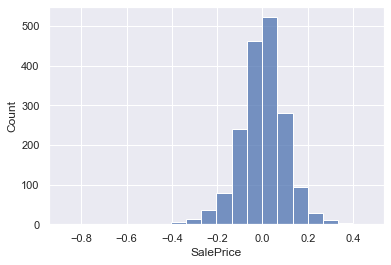

In [11]:
lasso1 = regx3(model= Lasso(max_iter=12000),
x_train = model_vars_data,
x_test = test_vars_data,
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45.50,55,100]},
cv_ = 5,
linear_reg = True,
tree_based = False)